In [2]:
import os

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import librosa

print(librosa.__version__)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

0.11.0
2.2.3
2.2.5
0.13.2


In [4]:
PATH = "environmental-sound-classification-50\\versions\\15\\audio\\audio\\16000\\"

files = os.listdir(PATH)
files_count = len(files)
print("Files:")
if files:
    for file in files:
        print(file)
else:
    print("No files found.")


print(f"Number of files: {files_count}")

Files:
1-100032-A-0.wav
1-100038-A-14.wav
1-100210-A-36.wav
1-100210-B-36.wav
1-101296-A-19.wav
1-101296-B-19.wav
1-101336-A-30.wav
1-101404-A-34.wav
1-103298-A-9.wav
1-103995-A-30.wav
1-103999-A-30.wav
1-104089-A-22.wav
1-104089-B-22.wav
1-105224-A-22.wav
1-110389-A-0.wav
1-110537-A-22.wav
1-115521-A-19.wav
1-115545-A-48.wav
1-115545-B-48.wav
1-115545-C-48.wav
1-115546-A-48.wav
1-115920-A-22.wav
1-115920-B-22.wav
1-115921-A-22.wav
1-116765-A-41.wav
1-11687-A-47.wav
1-118206-A-31.wav
1-118559-A-17.wav
1-119125-A-45.wav
1-121951-A-8.wav
1-12653-A-15.wav
1-12654-A-15.wav
1-12654-B-15.wav
1-13571-A-46.wav
1-13572-A-46.wav
1-13613-A-37.wav
1-137-A-32.wav
1-137296-A-16.wav
1-14262-A-37.wav
1-155858-A-25.wav
1-155858-B-25.wav
1-155858-C-25.wav
1-155858-D-25.wav
1-155858-E-25.wav
1-155858-F-25.wav
1-15689-A-4.wav
1-15689-B-4.wav
1-160563-A-48.wav
1-160563-B-48.wav
1-16568-A-3.wav
1-16746-A-15.wav
1-17092-A-27.wav
1-17092-B-27.wav
1-17124-A-43.wav
1-17150-A-12.wav
1-172649-A-40.wav
1-172649-B-

In [5]:
df = pd.read_csv('environmental-sound-classification-50/versions/15/esc50.csv')
print(df.head())
print(df.info())

            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB
None


In [6]:
print(f"Total samples: {len(df)}")
print(f"Unique classes: {df['category'].nunique()}")
print("Class distribution:")
print(df['category'].value_counts())


Total samples: 2000
Unique classes: 50
Class distribution:
category
dog                 40
chirping_birds      40
vacuum_cleaner      40
thunderstorm        40
door_wood_knock     40
can_opening         40
crow                40
clapping            40
fireworks           40
chainsaw            40
airplane            40
mouse_click         40
pouring_water       40
train               40
sheep               40
water_drops         40
church_bells        40
clock_alarm         40
keyboard_typing     40
wind                40
footsteps           40
frog                40
cow                 40
brushing_teeth      40
car_horn            40
crackling_fire      40
helicopter          40
drinking_sipping    40
rain                40
insects             40
laughing            40
hen                 40
engine              40
breathing           40
crying_baby         40
hand_saw            40
coughing            40
glass_breaking      40
snoring             40
toilet_flush        40
pig         

In [7]:
audio_path = 'environmental-sound-classification-50/versions/15/audio/audio/16000/'
wav_files = os.listdir(audio_path)

print(f"Number of .wav files: {len(wav_files)}")

Number of .wav files: 2000


In [8]:
csv_files = set(df['filename'])
missing = [f for f in wav_files if f not in csv_files]

print(f"Missing metadata entries: {len(missing)}")


Missing metadata entries: 0


In [9]:
durations = []
sample_rates = []

for f in df['filename'].head(100):
    y, sr = librosa.load(os.path.join(audio_path, f), sr=None)
    durations.append(len(y) / sr)
    sample_rates.append(sr)

print(f"Average duration: {sum(durations)/len(durations):.2f} seconds")
print(f"Sample rates: {set(sample_rates)}")


Average duration: 5.00 seconds
Sample rates: {16000}


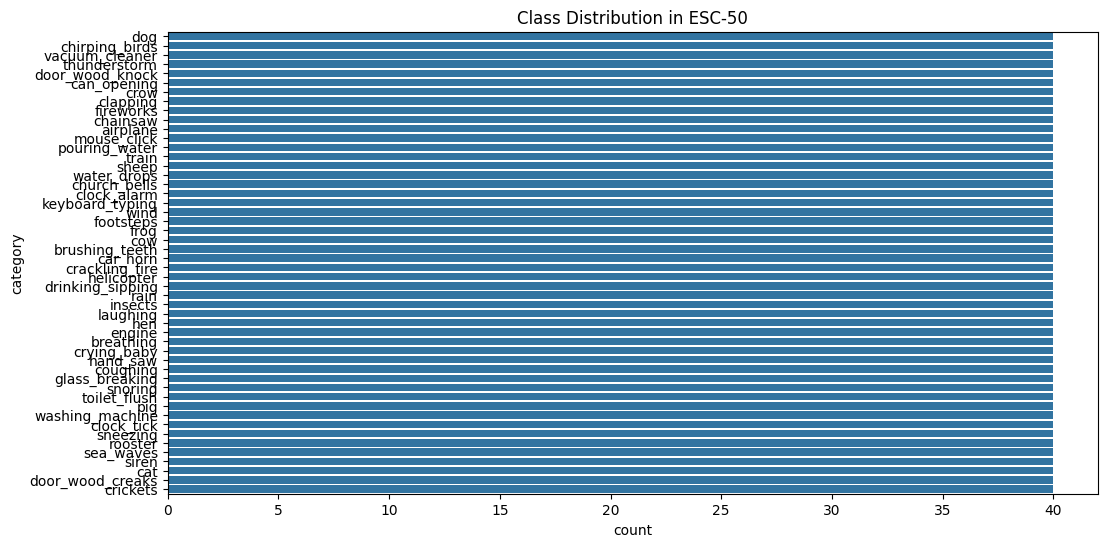

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title("Class Distribution in ESC-50")
plt.show()


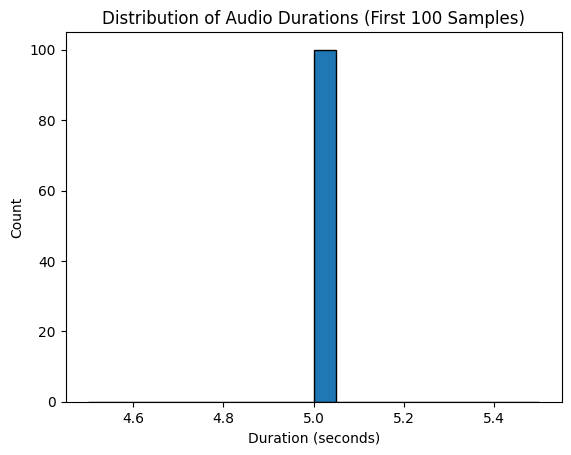

In [11]:
plt.hist(durations, bins=20, edgecolor='black')
plt.title("Distribution of Audio Durations (First 100 Samples)")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()


             category  target
25           airplane      47
76          breathing      23
51     brushing_teeth      27
7         can_opening      34
53           car_horn      43
175               cat       5
24           chainsaw      41
1      chirping_birds      14
33       church_bells      46
11           clapping      22
35        clock_alarm      37
110        clock_tick      38
84           coughing      24
49                cow       3
54     crackling_fire      12
286          crickets      13
8                crow       9
78        crying_baby      20
0                 dog       0
252  door_wood_creaks      33
6     door_wood_knock      30
61   drinking_sipping      29
74             engine      44
17          fireworks      48
39          footsteps      25
45               frog       4
95     glass_breaking      39
82           hand_saw      49
55         helicopter      40
70                hen       6
64            insects       7
36    keyboard_typing      32
68        

C:\Users\londonreturns\AppData\Local\Temp\ipykernel_3956\1230104836.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='coolwarm')


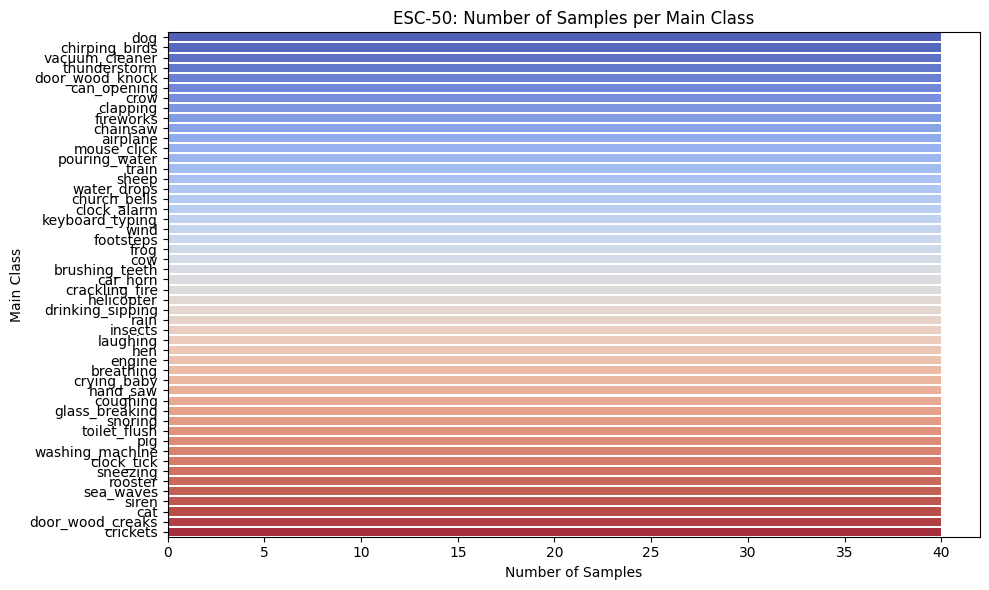

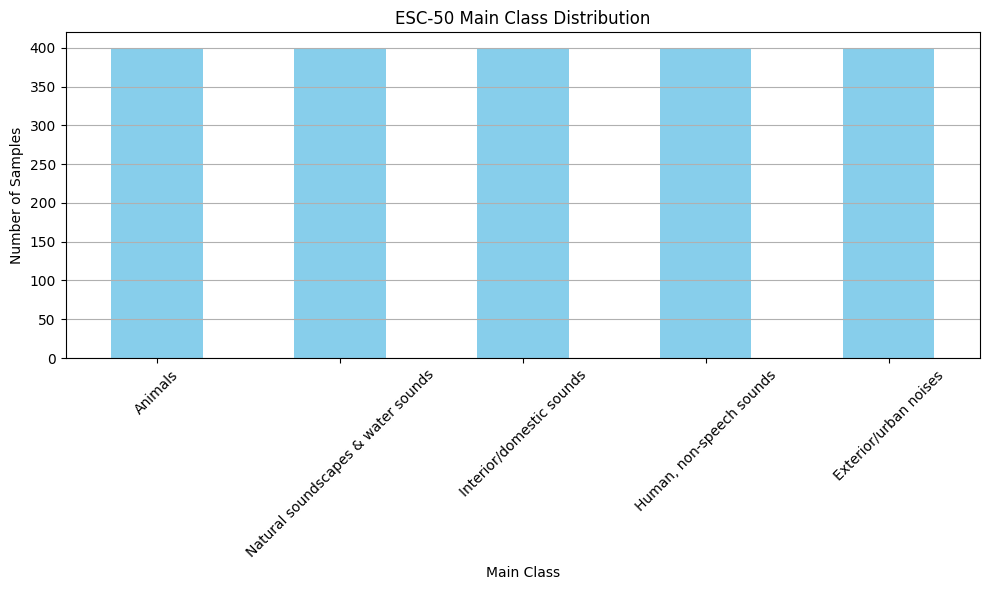

In [17]:
# Manual mapping from category to main category
main_category_map = {
    'dog': 'Animals', 'rooster': 'Animals', 'pig': 'Animals', 'cow': 'Animals', 'frog': 'Animals',
    'cat': 'Animals', 'hen': 'Animals', 'insects': 'Animals', 'sheep': 'Animals', 'crow': 'Animals',

    'rain': 'Natural soundscapes & water sounds', 'sea_waves': 'Natural soundscapes & water sounds',
    'crackling_fire': 'Natural soundscapes & water sounds', 'crickets': 'Natural soundscapes & water sounds',
    'chirping_birds': 'Natural soundscapes & water sounds', 'water_drops': 'Natural soundscapes & water sounds',
    'wind': 'Natural soundscapes & water sounds', 'pouring_water': 'Natural soundscapes & water sounds',
    'toilet_flush': 'Natural soundscapes & water sounds', 'thunderstorm': 'Natural soundscapes & water sounds',

    'crying_baby': 'Human, non-speech sounds', 'sneezing': 'Human, non-speech sounds',
    'clapping': 'Human, non-speech sounds', 'breathing': 'Human, non-speech sounds',
    'coughing': 'Human, non-speech sounds', 'footsteps': 'Human, non-speech sounds',
    'laughing': 'Human, non-speech sounds', 'brushing_teeth': 'Human, non-speech sounds',
    'snoring': 'Human, non-speech sounds', 'drinking_sipping': 'Human, non-speech sounds',

    'door_wood_knock': 'Interior/domestic sounds', 'mouse_click': 'Interior/domestic sounds',
    'keyboard_typing': 'Interior/domestic sounds', 'door_wood_creaks': 'Interior/domestic sounds',
    'can_opening': 'Interior/domestic sounds', 'washing_machine': 'Interior/domestic sounds',
    'vacuum_cleaner': 'Interior/domestic sounds', 'clock_alarm': 'Interior/domestic sounds',
    'clock_tick': 'Interior/domestic sounds', 'glass_breaking': 'Interior/domestic sounds',

    'helicopter': 'Exterior/urban noises', 'chainsaw': 'Exterior/urban noises',
    'siren': 'Exterior/urban noises', 'car_horn': 'Exterior/urban noises', 'engine': 'Exterior/urban noises',
    'train': 'Exterior/urban noises', 'church_bells': 'Exterior/urban noises',
    'airplane': 'Exterior/urban noises', 'fireworks': 'Exterior/urban noises', 'hand_saw': 'Exterior/urban noises'
}

# Map categories to main categories
df['main_category'] = df['category'].map(main_category_map)

# Count and plot
main_category_distribution = df['main_category'].value_counts()

plt.figure(figsize=(10, 6))
main_category_distribution.plot(kind='bar', color='skyblue')
plt.title('ESC-50 Main Class Distribution')
plt.xlabel('Main Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()